In [4]:
import pandas as pd

df = pd.read_csv('coffee_consumption.csv')
df

,date,coffee_consumption
0,2019-01-01,14.301915
1,2019-01-02,12.905900
2,2019-01-03,10.046015
3,2019-01-04,6.354805
4,2019-01-07,8.545563
...,...,...
256,2019-12-25,12.250875
257,2019-12-26,7.513206
258,2019-12-27,9.464345
259,2019-12-30,14.623106


In [5]:
df.dtypes

date                   object
coffee_consumption    float64
dtype: object

In [6]:
pd.to_datetime(df.date)

0     2019-01-01
1     2019-01-02
2     2019-01-03
3     2019-01-04
4     2019-01-07
         ...    
256   2019-12-25
257   2019-12-26
258   2019-12-27
259   2019-12-30
260   2019-12-31
Name: date, Length: 261, dtype: datetime64[ns]

In [16]:
pd.to_datetime('14:Nov:19', format='%d:%b:%y')

Timestamp('2019-11-14 00:00:00')

In [19]:
df.date = pd.to_datetime(df.date)
df

,date,coffee_consumption
0,2019-01-01,14.301915
1,2019-01-02,12.905900
2,2019-01-03,10.046015
3,2019-01-04,6.354805
4,2019-01-07,8.545563
...,...,...
256,2019-12-25,12.250875
257,2019-12-26,7.513206
258,2019-12-27,9.464345
259,2019-12-30,14.623106


In [28]:
df.date.dt.month

0       1
1       1
2       1
3       1
4       1
       ..
256    12
257    12
258    12
259    12
260    12
Name: date, Length: 261, dtype: int64

In [31]:
df.date.dt.strftime('Today is %a-%d %B, %Y')

0       Today is Tue-01 January, 2019
1       Today is Wed-02 January, 2019
2       Today is Thu-03 January, 2019
3       Today is Fri-04 January, 2019
4       Today is Mon-07 January, 2019
                    ...              
256    Today is Wed-25 December, 2019
257    Today is Thu-26 December, 2019
258    Today is Fri-27 December, 2019
259    Today is Mon-30 December, 2019
260    Today is Tue-31 December, 2019
Name: date, Length: 261, dtype: object

In [ ]:
df = df.set_index('date')

In [49]:
df['2019-04':]

,coffee_consumption
date,
2019-04-01,12.678782
2019-04-02,11.115349
2019-04-03,11.937308
2019-04-04,9.422997
2019-04-05,9.421859
...,...
2019-12-25,12.250875
2019-12-26,7.513206
2019-12-27,9.464345


In [57]:
df.asfreq('D').fillna(0)

,coffee_consumption
date,
2019-01-01,14.301915
2019-01-02,12.905900
2019-01-03,10.046015
2019-01-04,6.354805
2019-01-05,0.000000
...,...
2019-12-27,9.464345
2019-12-28,0.000000
2019-12-29,0.000000


In [64]:
df.resample('M').agg(['min', 'mean', 'max', 'count'])

coffee_consumption                            
                          min       mean        max count
date                                                     
2019-01-31           6.354805  10.170728  14.301915    23
2019-02-28           6.805306  10.301943  12.673222    20
2019-03-31           5.680393  10.465667  14.551441    21
2019-04-30           6.534674  10.092301  14.036570    22
2019-05-31           6.220478  10.803482  14.952719    23
2019-06-30           6.010460   9.182825  13.446564    20
2019-07-31           6.500401  10.794238  17.043445    23
2019-08-31           7.429678  10.182139  13.665973    22
2019-09-30           6.358469  10.270905  15.347007    21
2019-10-31           7.381459  10.615371  16.811112    23
2019-11-30           6.391103  10.310467  14.741298    21
2019-12-31           7.056316  10.453933  14.623106    22

In [68]:
df.resample('3W').mean()

,coffee_consumption
date,
2019-01-06,10.902159
2019-01-27,9.744190
2019-02-17,10.855301
2019-03-10,9.413472
2019-03-31,11.062768
2019-04-21,10.222518
2019-05-12,10.092044
2019-06-02,11.052819
2019-06-23,9.592148


In [78]:
from vega_datasets import data

weather = data.seattle_weather()
weather = weather[['date', 'temp_max']]
weather = weather.set_index('date')
weather

,temp_max
date,
2012-01-01,12.8
2012-01-02,10.6
2012-01-03,11.7
2012-01-04,12.2
2012-01-05,8.9
...,...
2015-12-27,4.4
2015-12-28,5.0
2015-12-29,7.2


In [80]:
weather.groupby(weather.index.month).mean()

,temp_max
date,
1,8.229032
2,9.860177
3,12.387097
4,15.020000
5,19.295968
6,22.400000
7,25.998387
8,26.112097
9,21.924167


In [81]:
weather.groupby([weather.index.year, weather.index.month]).mean()

temp_max
date date           
2012 1      7.054839
     2      9.275862
     3      9.554839
     4     14.873333
     5     17.661290
     6     18.693333
     7     22.906452
     8     25.858065
     9     22.880000
     10    15.829032
     11    11.326667
     12     7.235484
2013 1      6.106452
     2      9.467857
     3     12.709677
     4     14.243333
     5     19.625806
     6     23.253333
     7     26.093548
     8     26.119355
     9     21.360000
     10    14.229032
     11    12.053333
     12     7.022581
2014 1      9.600000
     2      8.200000
     3     12.906452
     4     15.460000
     5     19.870968
     6     21.590000
     7     26.900000
     8     26.383871
     9     23.163333
     10    17.961290
     11    11.030000
     12    10.138710
2015 1     10.154839
     2     12.517857
     3     14.377419
     4     15.503333
     5     20.025806
     6     26.063333
     7     28.093548
     8     26.087097
     9     20.293333
     10    17.538710
     11     9.683333
     12     8.380645

In [79]:
weather.resample('M').mean()

,temp_max
date,
2012-01-31,7.054839
2012-02-29,9.275862
2012-03-31,9.554839
2012-04-30,14.873333
2012-05-31,17.661290
2012-06-30,18.693333
2012-07-31,22.906452
2012-08-31,25.858065
2012-09-30,22.880000


In [94]:
jan = df['2019-01'].copy()
jan = jan.asfreq('D').fillna(0)
jan

,coffee_consumption
date,
2019-01-01,14.301915
2019-01-02,12.905900
2019-01-03,10.046015
2019-01-04,6.354805
2019-01-05,0.000000
2019-01-06,0.000000
2019-01-07,8.545563
2019-01-08,9.410101
2019-01-09,7.219271


In [95]:
jan['3-day-avg'] = jan.rolling(3).mean()

In [96]:
jan

,coffee_consumption,3-day-avg
date,,
2019-01-01,14.301915,NaN
2019-01-02,12.905900,NaN
2019-01-03,10.046015,12.417943
2019-01-04,6.354805,9.768907
2019-01-05,0.000000,5.466940
2019-01-06,0.000000,2.118268
2019-01-07,8.545563,2.848521
2019-01-08,9.410101,5.985221
2019-01-09,7.219271,8.391645


In [108]:
feb = df['2019-02'].copy()
feb = feb.asfreq('D').fillna(0)
feb['shift(1)'] = feb.shift(1)
feb['shift(3)'] = feb.coffee_consumption.shift(3)
feb['shift(-1)'] = feb.coffee_consumption.shift(-1)
feb['delta_coffee_consumption'] = feb['coffee_consumption'] - feb['shift(1)']
feb

,coffee_consumption,shift(1),shift(3),shift(-1),delta_coffee_consumption
date,,,,,
2019-02-01,9.042273,NaN,NaN,0.000000,NaN
2019-02-02,0.000000,9.042273,NaN,0.000000,-9.042273
2019-02-03,0.000000,0.000000,NaN,12.673222,0.000000
2019-02-04,12.673222,0.000000,9.042273,11.562866,12.673222
2019-02-05,11.562866,12.673222,0.000000,9.532721,-1.110356
2019-02-06,9.532721,11.562866,0.000000,10.128274,-2.030145
2019-02-07,10.128274,9.532721,12.673222,12.080342,0.595553
2019-02-08,12.080342,10.128274,11.562866,0.000000,1.952068
2019-02-09,0.000000,12.080342,9.532721,0.000000,-12.080342


In [111]:
march = df['2019-03'].copy().asfreq('D').fillna(0)

march['diff(1)'] = march.diff(1)
march

,coffee_consumption,diff(1)
date,,
2019-03-01,9.109061,NaN
2019-03-02,0.000000,-9.109061
2019-03-03,0.000000,0.000000
2019-03-04,9.054681,9.054681
2019-03-05,9.915438,0.860758
2019-03-06,11.254156,1.338718
2019-03-07,5.680393,-5.573763
2019-03-08,8.823756,3.143364
2019-03-09,0.000000,-8.823756


In [115]:
type(df.index.tz)

NoneType

In [120]:
central_timestamps = df.index.tz_localize('America/Chicago')
central_timestamps

DatetimeIndex(['2019-01-01 00:00:00-06:00', '2019-01-02 00:00:00-06:00',
               '2019-01-03 00:00:00-06:00', '2019-01-04 00:00:00-06:00',
               '2019-01-07 00:00:00-06:00', '2019-01-08 00:00:00-06:00',
               '2019-01-09 00:00:00-06:00', '2019-01-10 00:00:00-06:00',
               '2019-01-11 00:00:00-06:00', '2019-01-14 00:00:00-06:00',
               ...
               '2019-12-18 00:00:00-06:00', '2019-12-19 00:00:00-06:00',
               '2019-12-20 00:00:00-06:00', '2019-12-23 00:00:00-06:00',
               '2019-12-24 00:00:00-06:00', '2019-12-25 00:00:00-06:00',
               '2019-12-26 00:00:00-06:00', '2019-12-27 00:00:00-06:00',
               '2019-12-30 00:00:00-06:00', '2019-12-31 00:00:00-06:00'],
              dtype='datetime64[ns, America/Chicago]', name='date', length=261, freq=None)

In [121]:
central_timestamps.tz_convert('UTC')

DatetimeIndex(['2019-01-01 06:00:00+00:00', '2019-01-02 06:00:00+00:00',
               '2019-01-03 06:00:00+00:00', '2019-01-04 06:00:00+00:00',
               '2019-01-07 06:00:00+00:00', '2019-01-08 06:00:00+00:00',
               '2019-01-09 06:00:00+00:00', '2019-01-10 06:00:00+00:00',
               '2019-01-11 06:00:00+00:00', '2019-01-14 06:00:00+00:00',
               ...
               '2019-12-18 06:00:00+00:00', '2019-12-19 06:00:00+00:00',
               '2019-12-20 06:00:00+00:00', '2019-12-23 06:00:00+00:00',
               '2019-12-24 06:00:00+00:00', '2019-12-25 06:00:00+00:00',
               '2019-12-26 06:00:00+00:00', '2019-12-27 06:00:00+00:00',
               '2019-12-30 06:00:00+00:00', '2019-12-31 06:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='date', length=261, freq=None)

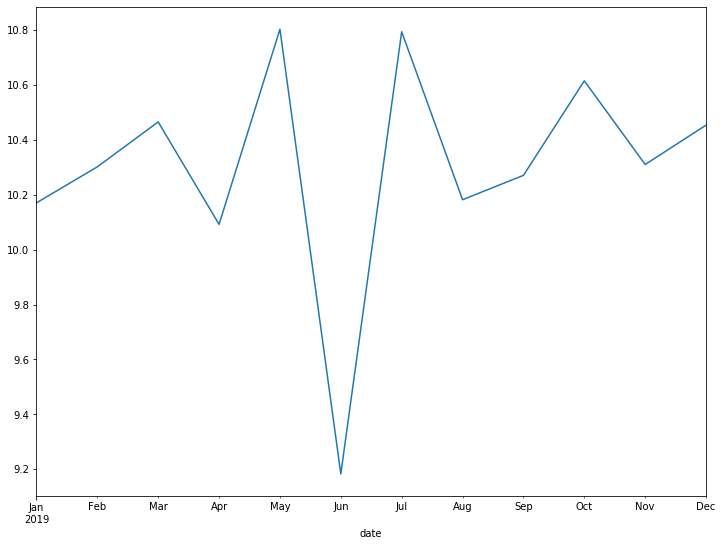

In [129]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 9))

# df.plot()
df.resample('M').coffee_consumption.mean().plot()

In [135]:
df.assign(some_other_column=lambda df: df.coffee_consumption + 100)

,coffee_consumption,some_other_column
date,,
2019-01-01,14.301915,114.301915
2019-01-02,12.905900,112.905900
2019-01-03,10.046015,110.046015
2019-01-04,6.354805,106.354805
2019-01-07,8.545563,108.545563
...,...,...
2019-12-25,12.250875,112.250875
2019-12-26,7.513206,107.513206
2019-12-27,9.464345,109.464345


In [136]:
df

,coffee_consumption
date,
2019-01-01,14.301915
2019-01-02,12.905900
2019-01-03,10.046015
2019-01-04,6.354805
2019-01-07,8.545563
...,...
2019-12-25,12.250875
2019-12-26,7.513206
2019-12-27,9.464345


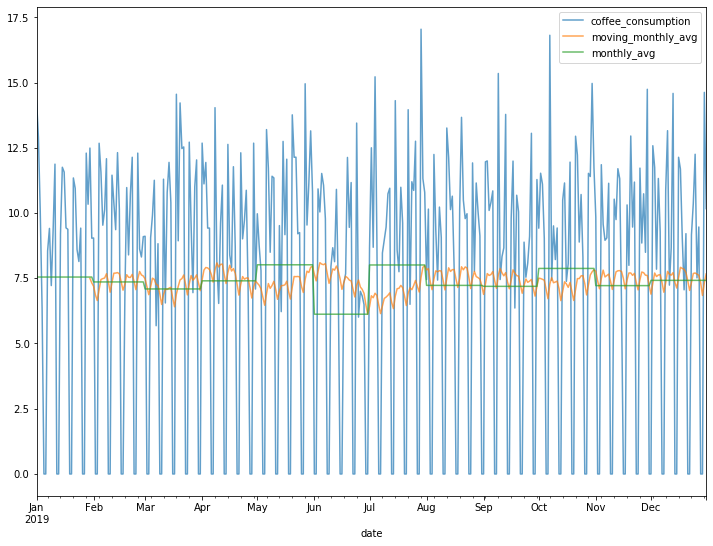

In [138]:
(df.asfreq('D')
 .fillna(0)
 .assign(moving_monthly_avg=lambda df: df.coffee_consumption.rolling(30).mean())
 .assign(monthly_avg=lambda df: df.coffee_consumption.resample('M').transform('mean'))
 .plot(alpha=.7))

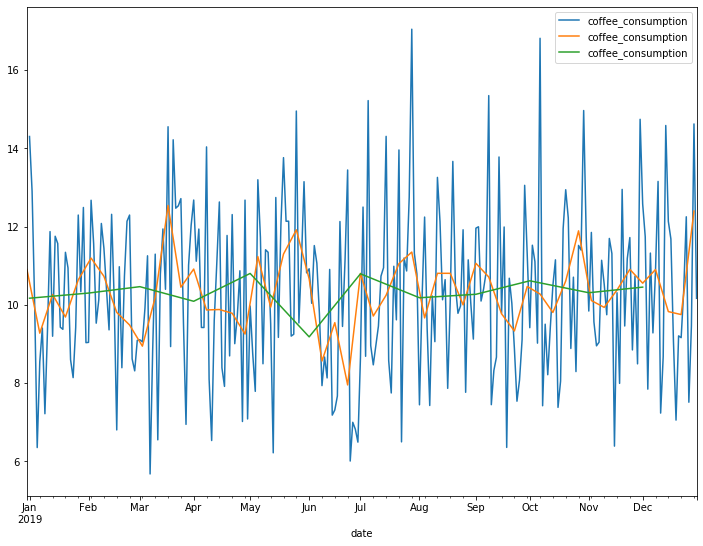

In [144]:
ax = df.plot()
df.resample('W').mean().plot(ax=ax)
df.resample('M').mean().plot(ax=ax)


In [63]:
import numpy as np

pd.Series([1, 2, 3, np.nan, 4]).mean()

2.5